In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import datetime

In [2]:
df=pd.read_csv('PBL5recommendationdata.csv',encoding='latin-1') #Reading data from csv file

C:\Users\fa\AppData\Local\Temp\ipykernel_3608\3720432031.py:1: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('PBL5recommendationdata.csv',encoding='latin-1') #Reading data from csv file


In [3]:
pd.set_option("display.max_columns",190)

In [4]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.00,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,52

## EDA-Exploratory Data Analysis

In [5]:
df.head() #Show the first 5 rows in the data frame

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,528

In [6]:
df.sample(10) #Show 10 random rows

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
813,667,keegan,oconnell,NaN,1422825694,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1437763347,0.0,3395,667,keegan,oconnell,NaN,3395,NaN,NaN,NaN,USD,NaN,8.52,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.47,NaN,fedex,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.422826e+09,NaN,authorize.net,NaN,18.47,NaN,6886058853,550177,NaN,1,1422825899,1.438868e+09,1.422999e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4896,3395,267.0,Sitz Bat

In [7]:
df.info() #Give information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [8]:
nulls = df.isnull().sum().to_frame() #Show how many null values in which column
for index, row in nulls.iterrows():
    print(index, row[0])

Customers.id 0
Customers.fname 0
Customers.lname 0
Customers.company 3467
Customers.create_date 0
Customers.status 4093
Customers.mailing 2080
Customers.reminders 4194
Customers.tax_exempt 4189
Customers.account_id 4191
Customers.sales_rep 4194
Customers.rewards 4194
Customers.profile_id 4194
Customers.last_modified 0
Customers.customer_type 423
Orders.id 0
Orders.customer_id 0
Orders.fname 0
Orders.lname 0
Orders.company 3466
Orders.order_number 0
Orders.reorder_id 4112
Orders.external_source 3829
Orders.external_id 4189
Orders.currency 0
Orders.sales_rep 4194
Orders.subtotal 0
Orders.tax 457
Orders.shipping 195
Orders.coupon_id 3312
Orders.coupon_amount 3312
Orders.gift_id 4194
Orders.gift_amount 4194
Orders.fee_name 3967
Orders.fee_amount 3916
Orders.discount_name 3912
Orders.discount_amount 3830
Orders.total 0
Orders.balance_due 3843
Orders.shipping_carrier 617
Orders.shipping_method 443
Orders.shipping_trans 4194
Orders.shipping_flags 4194
Orders.weight 4191
Orders.tracking 376
Or

In [9]:
df['Customers.customer_type'].value_counts() # How many of which customer type?

0.0    3319
1.0     386
2.0      66
Name: Customers.customer_type, dtype: int64

In [10]:
df['Orders.payment_status'].value_counts() 

3.0    4115
1.0      50
0.0      24
Name: Orders.payment_status, dtype: int64

In [11]:
df['Orders.status'].value_counts()

1     3875
5      153
3       65
4       31
14      24
0       24
12      12
15       7
8        2
2        1
Name: Orders.status, dtype: int64

In [12]:
df['Order_Items.product_id'].value_counts()

1842.0     88
2107.0     71
910.0      67
911.0      67
1867.0     53
           ..
12277.0     1
13303.0     1
3226.0      1
10142.0     1
562.0       1
Name: Order_Items.product_id, Length: 1753, dtype: int64

In [13]:
df['Order_Items.product_name'].value_counts() #How many people bought which product?

Medline MoliCare Super Plus Disposable Adult Diapers - Medium/Large Size                                                              53
Silent Knight Pill Crusher Pouches                                                                                                    48
Medline Emesis/Barf Bags, throw up bags, Blue - 24 Pack                                                                               47
Medline Deluxe Aluminum Transport Chair With Hand Brakes, Red, Wheels Front 8" Back 12", Leightweight Weighs 23 Lbs, Cap. 300 Lbs.    46
K1 Basic Extra-Wide Wheelchairs                                                                                                       36
                                                                                                                                      ..
CURAD Flex-Fabric Bandages, Brown, Yes                                                                                                 1
CURAD Comfort Fabric Bandages, Tan, No   

In [14]:
df['Order_Items.qty'].value_counts()

1      3222
2       539
3       154
4        87
6        49
5        45
10       36
8        15
30       12
12        8
20        8
11        3
9         3
7         3
24        2
200       1
17        1
22        1
40        1
26        1
15        1
122       1
500       1
Name: Order_Items.qty, dtype: int64

In [15]:
df['Products.google_shopping_type'].value_counts()

Wheelchairs > Manual Wheelchairs > Transport Wheelchairs                             214
Walking Aids > Rollators, & Walkers > Rollators                                      207
Incontinence, Urology & Ostomy > incontinence > Adult Disposable Briefs - Diapers    175
Incontinence, Urology & Ostomy > incontinence > Disposable Underwear - Pull Ups      117
Pharmacy > Medication & Aids > Pill Cutters/Crushers                                 113
                                                                                    ... 
Apparel > Gloves > Sterile PF LF Vinyl Exam Gloves                                     1
OR & Surgery Supplies > Stockinettes                                                   1
Daily Living Aids > Transfer Equipment > Safety Pole                                   1
Wheelchairs > Power Wheelchairs & Scooters > FWD Power Wheelchairs                     1
Personal Care > Feminine Hygiene > Cleansing                                           1
Name: Products.google

In [16]:
df['Products.name'].value_counts()

Emesis Bags,Blue,36.000 OZ                                                                                            103
MoliCare Disposable Super Plus Briefs,27"-47"                                                                          71
Aluminum Transport Chair with 12" Wheels,Red,F: 8   R: 12                                                              67
Aluminum Transport Chair with 12" Wheels,Blue,F: 8   R: 12                                                             67
K1 Basic Extra-Wide Wheelchairs                                                                                        54
                                                                                                                     ... 
CanDo&reg; Digi-Flex&reg; hand exerciser - Yellow, x-light - Finger (1.5 lb) / hand (5.0 lb)                            1
CanDo&reg; Digi-Squeeze&reg; hand exerciser - Small - set of 5 pieces (yellow, red, green, blue, black), with rack      1
Waterproof Cast Protecto

In [17]:
df1=df.dropna(axis=1) #Show columns that don't have null value
df1

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.total,Orders.status,Orders.placed_date,Order_Items.id,Order_Items.parent,Order_Items.product_name,Order_Items.qty,Order_Items.price
0,797,Christy,Dill,1426018724,1437764306,3758,797,Christy,Dill,3758,USD,57.20,64.29,1,1426019099,5284,3758,"Basic Rollators, Green",1,57.20
1,3,John,Smith,1386089139,1437764354,23,3,John,Smith,23,USD,20.00,29.99,1,1386090455,31,23,"Urinary Drain Bags,0.000",4,5.00
2,3,John,Smith,1386089139,1437764354,9531,3,John,Smith,9531,USD,68.78,78.73,3,1449603652,11655,9531,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78
3,4,James,Anderson,1386780263,1437762646,29,4,James,Anderson,29,USD,19.56,29.55,1,1386780263,1816,29,Basket for 2-Button Walkers,1,19.56
4,5,Abraham,Pollak,1386861599,1437764316,30,5,Abraham,Pollak,30,USD,36.05,46.00,1,1386861599,40,30,Tens Units,1,36.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,1463408698,1463408698,17421,3730,Nora,Fontana,17421,USD,14.85,16.06,0,1463408854,20186,17421,"Medline Emesis/Barf Bags, throw up bags, Blue ...",1,14.85
4190,3732,Kennithe,Tecora,1463412756,1463412756,17425,3732,Kennithe,Tecora,17425,USD,39.99,39.99,0,1463412757,20190,17425,Medline Home Bed Assist Bar,1,39.99
4191,3733,Tinna,Randall,1463413245,1463413245,17426,3733,Tinna,Randall,17426,USD,1099.00,989.10,5,1463413246,20191,17426,Spitfire EX Travel 4-Wheel Mobility Scooter 21...,1,1099.00
4192,3735,HALIMAH,SHAHID,1463416687,1463416687,17431,3735,HALIMAH,SHAHID,17431,USD,129.99,129.99,0,1463416694,20196,17431,"Standard Bariatric Heavy Duty Rollator, Burgun...",1,129.99


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customers.id              4194 non-null   int64  
 1   Customers.fname           4194 non-null   object 
 2   Customers.lname           4194 non-null   object 
 3   Customers.create_date     4194 non-null   int64  
 4   Customers.last_modified   4194 non-null   int64  
 5   Orders.id                 4194 non-null   int64  
 6   Orders.customer_id        4194 non-null   int64  
 7   Orders.fname              4194 non-null   object 
 8   Orders.lname              4194 non-null   object 
 9   Orders.order_number       4194 non-null   object 
 10  Orders.currency           4194 non-null   object 
 11  Orders.subtotal           4194 non-null   float64
 12  Orders.total              4194 non-null   float64
 13  Orders.status             4194 non-null   int64  
 14  Orders.p

In [19]:
df2 = df.dropna(axis=1,how='all',thresh=3800) #Show columns that have non null value for more than 3800 rows
df2

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.shipping,Orders.total,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.list_price,Products.price,Products.cost,Products.last_modified,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_type,Products.google_shopping_cat,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,1437764306,3758,797,Christy,Dill,3758,USD,57.20,9.95,64.29,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green",80.70,57.64,44.00,1.463163e+09,MEDLINE,MDS86850EGS,62.0,health-care-products,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,"<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,EA,24.80,7.50,30.40,PF61071,0.0
1,3,John,Smith,1386089139,1437764354,23,3,John,Smith,23,USD,20.00,9.99,29.99,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,14.41,10.29,1.87,1.462370e+09,MEDLINE,DYNC1674H,62.0,health-care-products,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,EA,8.00,7.00,1.50,PF02132,NaN
2,3,John,Smith,1386089139,1437764354,9531,3,John,Smith,9531,USD,68.78,9.95,78.73,NaN,3.0,1.449604e+09,authorize.net,78.73,3,1449603652,1.450213e+09,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",96.29,68.78,52.50,1.463163e+09,MEDLINE,484805,62.0,health-care-products,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitrile-Exam-GlovesBlueXX-Large,CS,13.23,10.04,10.24,PF00342,0.0
3,4,James,Anderson,1386780263,1437762646,29,4,James,Anderson,29,USD,19.56,9.95,29.55,7.96468E+14,3.0,1.386780e+09,NaN,29.55,1,1386780263,1.440529e+09,1.386800e+09,0.0,1816,29,983.0,Basket for 2-Button Walkers,1,19.56,12.62,983.0,0.0,sub-product-detail.html,1.0,3.0,Basket for 2-Button Walkers,27.38,19.56,12.62,1.462595e+09,MEDLINE,MDS86615KH,62.0,health-care-products,"Walking Aids > Rollators, & Walkers > Walkers ...",Health & Beauty > Health Care,<ul><li> This wire basket attaches to almost a...,Basket for 2-Button Walkers | MEDLINE - MDS866...,Basket-for-2-Button-Walkers-2,EA,10.60,7.80,18.50,PF04970,NaN
4,5,Abraham,Pollak,1386861599,1437764316,30,5,Abraham,Pollak,30,USD,36.05,9.95,46.00,6.87398E+14,3.0,1.386862e+09,NaN,46.00,1,1386861599,1.440529e+09,1.386876e+09,0.0,40,30,991.0,Tens Units,1,36.05,25.75,991.0,1.0,sub-product-detail.html,1.0,3.0,TENS 3000 Analog Unit,50.47,36.05,25.75,1.462370e+09,ROSCOE MEDICAL INC,MDS86710,62.0,health-care-products,Physical Therapy > Electronic Muscle Stimulation,Health & Beauty > Health Care,<ul><li>

In [20]:
df2[['Products.saved_status','Orders.payment_status','Products.cost','Products.price','Products.status','Order_Items.cost','Order_Items.price']]

,Products.saved_status,Orders.payment_status,Products.cost,Products.price,Products.status,Order_Items.cost,Order_Items.price
0,0.0,3.0,44.00,57.64,0.0,44.00,57.20
1,NaN,3.0,1.87,10.29,1.0,1.87,5.00
2,0.0,3.0,52.50,68.78,0.0,52.50,68.78
3,NaN,3.0,12.62,19.56,0.0,12.62,19.56
4,NaN,3.0,25.75,36.05,1.0,25.75,36.05
...,...,...,...,...,...,...,...
4189,3.0,3.0,15.50,23.65,3.0,15.50,14.85
4190,3.0,1.0,28.16,69.99,3.0,28.16,39.99
4191,3.0,1.0,675.00,1099.00,3.0,675.00,1099.00
4192,3.0,3.0,91.00,129.99,3.0,91.00,129.99


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.last_modified        4194 non-null   int64  
 5   Orders.id                      4194 non-null   int64  
 6   Orders.customer_id             4194 non-null   int64  
 7   Orders.fname                   4194 non-null   object 
 8   Orders.lname                   4194 non-null   object 
 9   Orders.order_number            4194 non-null   object 
 10  Orders.currency                4194 non-null   object 
 11  Orders.subtotal                4194 non-null   float64
 12  Orders.shipping                3999 non-null   f

## Data Preparation

In [22]:
x = df[['Orders.subtotal','Orders.payment_type','Order_Items.qty','Order_Items.product_id']]

In [23]:
x

,Orders.subtotal,Orders.payment_type,Order_Items.qty,Order_Items.product_id
0,57.20,authorize.net,1,2310.0
1,20.00,authorize.net,4,177.0
2,68.78,authorize.net,1,1.0
3,19.56,NaN,1,983.0
4,36.05,NaN,1,991.0
...,...,...,...,...
4189,14.85,paypal,1,1842.0
4190,39.99,authorize.net,1,782.0
4191,1099.00,authorize.net,1,2707.0
4192,129.99,paypal,1,993.0


In [24]:
x.sample(10)

,Orders.subtotal,Orders.payment_type,Order_Items.qty,Order_Items.product_id
1188,1399.00,authorize.net,1,2679.0
1223,159.51,authorize.net,1,747.0
1107,16.49,NaN,1,1842.0
2089,117.60,authorize.net,3,1610.0
3176,12.81,authorize.net,1,1511.0
4111,24.40,NaN,1,1411.0
1063,76.94,authorize.net,1,960.0
2100,77.99,authorize.net,1,3238.0
80,268.75,authorize.net,1,940.0
444,232.98,authorize.net,2,1499.0


In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Orders.subtotal         4194 non-null   float64
 1   Orders.payment_type     3810 non-null   object 
 2   Order_Items.qty         4194 non-null   int64  
 3   Order_Items.product_id  4151 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 131.2+ KB


In [26]:
x['Orders.payment_type'].value_counts()

authorize.net    3454
paypal            318
Credit Card        32
Check               5
Cash                1
Name: Orders.payment_type, dtype: int64

In [27]:
x['Orders.payment_type'].fillna(method='ffill',inplace = True) #Fill in the blanks with the data in the previous row.

C:\Users\fa\AppData\Local\Temp\ipykernel_3608\1488705392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Orders.payment_type'].fillna(method='ffill',inplace = True) #Fill in the blanks with the data in the previous row.


In [28]:
x['Orders.payment_type'].value_counts()

authorize.net    3779
paypal            339
Credit Card        69
Check               5
Cash                2
Name: Orders.payment_type, dtype: int64

<AxesSubplot:>

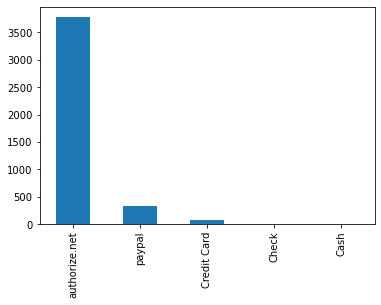

In [29]:
x['Orders.payment_type'].value_counts(dropna=False).plot(kind='bar')

In [30]:
x['Order_Items.product_id'] =x['Order_Items.product_id'].astype(str)  #convert float to string type

C:\Users\fa\AppData\Local\Temp\ipykernel_3608\686700381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Order_Items.product_id'] =x['Order_Items.product_id'].astype(str)  #convert float to string type


In [31]:
#Convert categorical variable into dummy/indicator variables.
x = pd.get_dummies(x, drop_first=True)

In [32]:
x

,Orders.subtotal,Order_Items.qty,Orders.payment_type_Check,Orders.payment_type_Credit Card,Orders.payment_type_authorize.net,Orders.payment_type_paypal,Order_Items.product_id_100.0,Order_Items.product_id_1000.0,Order_Items.product_id_1001.0,Order_Items.product_id_1002.0,Order_Items.product_id_1003.0,Order_Items.product_id_1004.0,Order_Items.product_id_1005.0,Order_Items.product_id_1006.0,Order_Items.product_id_1008.0,Order_Items.product_id_1009.0,Order_Items.product_id_1010.0,Order_Items.product_id_1011.0,Order_Items.product_id_10119.0,Order_Items.product_id_1012.0,Order_Items.product_id_10120.0,Order_Items.product_id_10121.0,Order_Items.product_id_1014.0,Order_Items.product_id_10142.0,Order_Items.product_id_1015.0,Order_Items.product_id_1016.0,Order_Items.product_id_10160.0,Order_Items.product_id_1017.0,Order_Items.product_id_10174.0,Order_Items.product_id_1018.0,Order_Items.product_id_1020.0,Order_Items.product_id_10212.0,Order_Items.product_id_1022.0,Order_Items.product_id_1023.0,Order_Items.product_id_10238.0,Order_Items.product_id_1025.0,Order_Items.product_id_1026.0,Order_Items.product_id_1027.0,Order_Items.product_id_10278.0,Order_Items.product_id_1029.0,Order_Items.product_id_10294.0,Order_Items.product_id_10295.0,Order_Items.product_id_1031.0,Order_Items.product_id_10311.0,Order_Items.product_id_10312.0,Order_Items.product_id_10314.0,Order_Items.product_id_1032.0,Order_Items.product_id_1033.0,Order_Items.product_id_10338.0,Order_Items.product_id_1034.0,Order_Items.product_id_10341.0,Order_Items.product_id_10345.0,Order_Items.product_id_10349.0,Order_Items.product_id_10355.0,Order_Items.product_id_10358.0,Order_Items.product_id_1036.0,Order_Items.product_id_10364.0,Order_Items.product_id_10371.0,Order_Items.product_id_10423.0,Order_Items.product_id_10428.0,Order_Items.product_id_10436.0,Order_Items.product_id_1044.0,Order_Items.product_id_10441.0,Order_Items.product_id_10443.0,Order_Items.product_id_105.0,Order_Items.product_id_10508.0,Order_Items.product_id_10544.0,Order_Items.product_id_10567.0,Order_Items.product_id_10577.0,Order_Items.product_id_10590.0,Order_Items.product_id_10597.0,Order_Items.product_id_10605.0,Order_Items.product_id_1065.0,Order_Items.product_id_1066.0,Order_Items.product_id_10698.0,Order_Items.product_id_1074.0,Order_Items.product_id_10749.0,Order_Items.product_id_1076.0,Order_Items.product_id_1077.0,Order_Items.product_id_10828.0,Order_Items.product_id_1083.0,Order_Items.product_id_10830.0,Order_Items.product_id_10831.0,Order_Items.product_id_10833.0,Order_Items.product_id_10849.0,Order_Items.product_id_1085.0,Order_Items.product_id_1087.0,Order_Items.product_id_10874.0,Order_Items.product_id_10876.0,Order_Items.product_id_10878.0,Order_Items.product_id_10880.0,Order_Items.product_id_1091.0,Order_Items.product_id_1093.0,Order_Items.product_id_10943.0,Order_Items.product_id_10966.0,...,Order_Items.product_id_8978.0,Order_Items.product_id_898.0,Order_Items.product_id_8986.0,Order_Items.product_id_8990.0,Order_Items.product_id_8992.0,Order_Items.product_id_8998.0,Order_Items.product_id_900.0,Order_Items.product_id_9001.0,Order_Items.product_id_901.0,Order_Items.product_id_902.0,Order_Items.product_id_9028.0,Order_Items.product_id_903.0,Order_Items.product_id_904.0,Order_Items.product_id_9045.0,Order_Items.product_id_905.0,Order_Items.product_id_9053.0,Order_Items.product_id_906.0,Order_Items.product_id_908.0,Order_Items.product_id_909.0,Order_Items.product_id_910.0,Order_Items.product_id_9106.0,Order_Items.product_id_911.0,Order_Items.product_id_9116.0,Order_Items.product_id_9119.0,Order_Items.product_id_913.0,Order_Items.product_id_9143.0,Order_Items.product_id_9148.0,Order_Items.product_id_915.0,Order_Items.product_id_916.0,Order_Items.product_id_918.0,Order_Items.product_id_919.0,Order_Items.product_id_9199.0,Order_Items.product_id_921.0,Order_Items.product_id_929.0,Order_Items.product_id_930.0,Order_Items.product_id_932.0,Order_Items.product_id_933.0,Order_Items.product_id_934.0,Order_Items.

## Modeling

In [33]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters=no_of_cluster)
        pred = model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred) #Model evaluation metrics
        print(f'Number of cluster {no_of_cluster}, silhouette {score}')
        allscore.append(score)
        allclusters.append(no_of_cluster)

#Number of clusters where silhouette score remains constant number of customer segments should be selected
#When we look at the results, the number of customer segmentation should be 5
clust(10)

Number of cluster 2, silhouette 0.8940055352613288
Number of cluster 3, silhouette 0.8609756101546878
Number of cluster 4, silhouette 0.7019063277955012
Number of cluster 5, silhouette 0.6942042766193198
Number of cluster 6, silhouette 0.6210896558889477
Number of cluster 7, silhouette 0.6393416520878095
Number of cluster 8, silhouette 0.6415041657472674
Number of cluster 9, silhouette 0.6085003991092146
Number of cluster 10, silhouette 0.6023106680625561


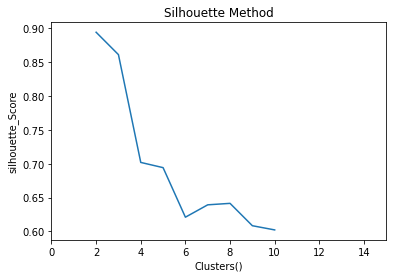

In [34]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('silhouette_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

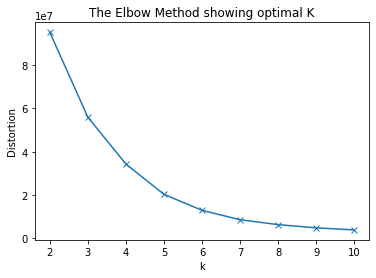

In [35]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()
#If we compare the graph to an arm, the point that looks like an elbow should be the number of customer segments.
#When we look at the chart, the number of customer segmentation should be 5

In [36]:
model = KMeans(n_clusters=5)

In [37]:
model = model.fit(x)

In [38]:
pred = model.predict(x)

In [39]:
pred 

array([0, 0, 0, ..., 1, 0, 0])

In [40]:
silhouette_score(x,pred)

0.70273471402434

In [41]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [42]:
df['Cluster']=pred #Which customer belongs to which cluster?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


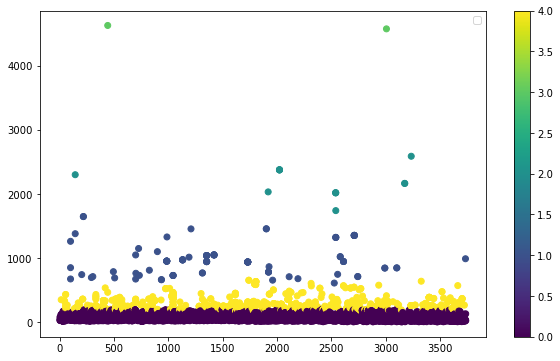

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(y=df['Orders.total'],x=df['Customers.id'],c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [44]:
#'Order_Items.reorder_frequency' column with nan values removed
df['Order_Items.reorder_frequency'].dropna() 

5       2.0
6       3.0
1004    1.0
1537    1.0
1607    1.0
1617    3.0
1675    1.0
1870    2.0
1875    2.0
1988    1.0
2010    1.0
2020    1.0
2022    1.0
2375    1.0
2399    4.0
2505    2.0
2516    1.0
2517    1.0
2539    1.0
2817    1.0
3134    3.0
3178    2.0
3279    1.0
3703    3.0
Name: Order_Items.reorder_frequency, dtype: float64

In [45]:
#Purpose: find how many unique values are in columns
#Parameter: dataframe
def unique_counts(df):
    for i in df[['Order_Items.product_id','Customers.id','Customers.company']]:#for which columns
        count = df[i].nunique()
        print(i, ": ", count)
unique_counts(df)
#There are 1753 different items ordered.

Order_Items.product_id :  1753
Customers.id :  3054
Customers.company :  425


In [46]:
#Find the last order date
df['Customers.last_modified']=df['Customers.last_modified'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)/1000).strftime('%Y-%m-%d %H:%M:%S'))

In [47]:
df['Customers.last_modified'].sort_values()

1422    1970-01-17 18:19:19
1254    1970-01-17 18:19:19
1253    1970-01-17 18:19:19
628     1970-01-17 18:19:19
1251    1970-01-17 18:19:19
               ...         
4189    1970-01-18 01:30:08
4190    1970-01-18 01:30:12
4191    1970-01-18 01:30:13
4192    1970-01-18 01:30:16
4193    1970-01-18 01:30:18
Name: Customers.last_modified, Length: 4194, dtype: object

In [48]:
#Find the customer's total spend on their purchases and the last purchase date
df_x = df.groupby('Customers.id').agg({'Orders.subtotal': lambda x: x.sum(),
                                        'Customers.last_modified': lambda x: ( x.max())})

In [49]:
#Find the id of the products ordered by the customers and the order total
df_y = df.groupby(['Customers.id','Order_Items.product_id']).agg({'Orders.subtotal': lambda x: x.sum()})

In [50]:
#Find how many times customers order
df_z = df_y.groupby('Customers.id').agg({'Orders.subtotal': lambda x: len(x)})

In [51]:
rfm_table= pd.merge(df_x,df_z, on='Customers.id')

In [52]:
rfm_table.rename(columns= {'Customers.last_modified': 'Recency',
                          'Orders.subtotal_y': 'Frequency',
                          'Orders.subtotal_x': 'Monetary'}, inplace= True)

In [53]:
rfm_table
# Monetary->how much money he/she spent
# Recency->when was the last time he/she ordered
# Frequency->how often ordered

,Monetary,Recency,Frequency
Customers.id,,,
3,88.78,1970-01-17 18:22:44,2
4,19.56,1970-01-17 18:22:42,1
5,95.14,1970-01-17 18:22:44,3
7,39.19,1970-01-17 18:22:43,1
8,59.75,1970-01-17 18:22:43,1
...,...,...,...
3730,14.85,1970-01-18 01:30:08,1
3732,39.99,1970-01-18 01:30:12,1
3733,1099.00,1970-01-18 01:30:13,1


In [54]:
rfm_table.head()

,Monetary,Recency,Frequency
Customers.id,,,
3,88.78,1970-01-17 18:22:44,2
4,19.56,1970-01-17 18:22:42,1
5,95.14,1970-01-17 18:22:44,3
7,39.19,1970-01-17 18:22:43,1
8,59.75,1970-01-17 18:22:43,1


In [55]:
rfm_table.tail()

,Monetary,Recency,Frequency
Customers.id,,,
3730,14.85,1970-01-18 01:30:08,1
3732,39.99,1970-01-18 01:30:12,1
3733,1099.00,1970-01-18 01:30:13,1
3735,129.99,1970-01-18 01:30:16,1
3736,24.54,1970-01-18 01:30:18,1


In [56]:
rfm_table['Monetary'].sort_values() #Customer who spends the most->1043

Customers.id
3145        2.89
1648        3.64
2308        4.16
2882        4.24
2703        4.35
          ...   
1616     8291.48
1730     8452.78
2022     9502.36
1352    10383.00
1043    15041.56
Name: Monetary, Length: 3026, dtype: float64

In [57]:
x2=rfm_table[['Monetary','Frequency']] 

In [58]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x2)
        pred=model.fit_predict(x2)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x2,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(15)

Number of cluster 2, silhouette 0.9628436996903627
Number of cluster 3, silhouette 0.9456410204750941
Number of cluster 4, silhouette 0.8775287387491917
Number of cluster 5, silhouette 0.8774781139836496
Number of cluster 6, silhouette 0.8436040644759133
Number of cluster 7, silhouette 0.7798023405143126
Number of cluster 8, silhouette 0.6817470606609202
Number of cluster 9, silhouette 0.6403140780286505
Number of cluster 10, silhouette 0.6487397390461844
Number of cluster 11, silhouette 0.6555381165924525
Number of cluster 12, silhouette 0.6562549084121004
Number of cluster 13, silhouette 0.6487600573152394
Number of cluster 14, silhouette 0.649133126984294
Number of cluster 15, silhouette 0.6483153582275629


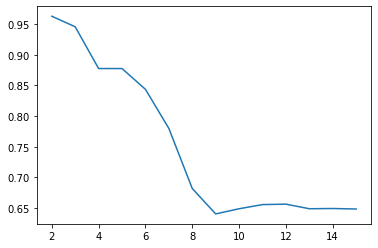

In [59]:
plt.plot(allclusters,allscore)

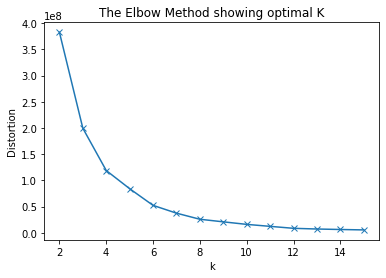

In [60]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

In [61]:
model=KMeans(n_clusters=8)

In [62]:
model=model.fit(x2)

In [63]:
pred=model.predict(x2)

In [64]:
x2['Cluster']=pred

In [65]:
x2.sample(10)

,Monetary,Frequency,Cluster
Customers.id,,,
130,110.58,1,1
2315,565.00,1,0
1497,121.80,1,1
52,53.72,1,1
249,63.99,1,1
102,88.68,1,1
1805,3165.10,5,4
3485,49.36,1,1
1452,64.80,1,1


In [66]:
silhouette_score(x2,pred)

0.7087430961792315

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


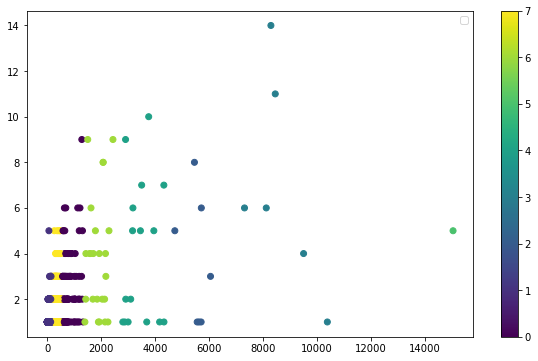

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(x2['Monetary'],x2['Frequency'],c=pred)
plt.legend()
plt.colorbar()
plt.show()